In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import json
from shapely.geometry import Point

Analyzing Aggravated Burglaries in Davidson County

Find all aggravated burglary incidents that were reported during the six month period from January 1, 2021 through June 30, 2021.

Use requests package to make a GET request to an API

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'
params = {'$where' : "incident_reported between '2021-01-01T00:00:00.000' and '2021-06-01T00:00:00.000'" 
}

In [3]:
response = requests.get(endpoint, params)

In [4]:
response

<Response [200]>

Read into a pandas DataFrame by using the IO library

In [5]:
from io import StringIO

In [6]:
incd = pd.read_json(StringIO(response.text))

In [7]:
incd.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,weapon_description,victim_number,domestic_related,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location
0,2020079749511,20200797495,D,DISPATCHED,U,UNFOUNDED,Closed,2020-12-31T23:20:00.000,2021-01-01T00:05:00.000,822 822,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.756, 36...."
1,2020079747711,20200797477,D,DISPATCHED,U,UNFOUNDED,Closed,2020-12-31T23:56:00.000,2021-01-01T00:06:00.000,323 323,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),F,B,Unknown,RESIDENT,"{'type': 'Point', 'coordinates': [-86.695, 36...."
2,2021000001911,20210000019,S,SUSPECT,U,UNFOUNDED,Closed,2021-01-01T00:06:00.000,2021-01-01T00:10:00.000,1211 1211,...,NONE,1,False,S,SOCIETY,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.776, 36...."
3,2020079739211,20200797392,D,DISPATCHED,U,UNFOUNDED,Closed,2020-12-31T22:00:00.000,2021-01-01T00:13:00.000,1616 1616,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Unknown,RESIDENT,"{'type': 'Point', 'coordinates': [-86.606, 36...."
4,2020079739212,20200797392,D,DISPATCHED,U,UNFOUNDED,Closed,2020-12-31T22:00:00.000,2021-01-01T00:13:00.000,1616 1616,...,NONE,2,True,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.606, 36...."


In [8]:
#incd.info()

In [9]:
#incd.isna().sum()

In [10]:
#incd=incd.dropna(subset=['longitude', 'latitude'])

In [11]:
#incd.isna().sum()

In [12]:
incd['incident_reported']=incd['incident_reported'].str.split('T', expand=True)[0]

In [13]:
incd['incident_reported'].head()

0    2021-01-01
1    2021-01-01
2    2021-01-01
3    2021-01-01
4    2021-01-01
Name: incident_reported, dtype: object

In [14]:
incd_filtr=pd.DataFrame(incd, columns=['incident_reported', 'offense_description', 'latitude','longitude','zip_code'])

In [15]:
incd_filtr.head()

,incident_reported,offense_description,latitude,longitude,zip_code
0,2021-01-01,POLICE INQUIRY,36.165,-86.756,37206.0
1,2021-01-01,POLICE INQUIRY,36.270,-86.695,37115.0
2,2021-01-01,EMERGENCY ORDER VIOLATION,36.196,-86.776,37207.0
3,2021-01-01,POLICE INQUIRY,36.198,-86.606,37076.0
4,2021-01-01,POLICE INQUIRY,36.198,-86.606,37076.0


In [16]:
incd_filtr.loc[incd_filtr['offense_description'].str.contains('BURGLARY- AGGRAVATED'),:]

,incident_reported,offense_description,latitude,longitude,zip_code
62,2021-01-01,BURGLARY- AGGRAVATED,36.170,-86.756,37206.0
301,2021-01-01,BURGLARY- AGGRAVATED,36.250,-86.660,NaN
315,2021-01-01,BURGLARY- AGGRAVATED,36.150,-86.820,NaN
350,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
351,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
352,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
353,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
354,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
355,2021-01-02,BURGLARY- AGGRAVATED,36.150,-86.780,NaN
373,2021-01-02,BURGLARY- AGGRAVATED,36.209,-86.763,37207.0


In [17]:
burglary=incd_filtr.loc[incd_filtr['offense_description'].str.contains('BURGLARY- AGGRAVATED'),:]

In [18]:
burglary.tail()

,incident_reported,offense_description,latitude,longitude,zip_code
855,2021-01-03,BURGLARY- AGGRAVATED,36.266,-86.685,37115.0
866,2021-01-03,BURGLARY- AGGRAVATED,36.123,-86.756,37211.0
875,2021-01-03,BURGLARY- AGGRAVATED,36.250,-86.760,NaN
876,2021-01-03,BURGLARY- AGGRAVATED,36.250,-86.760,NaN
930,2021-01-04,BURGLARY- AGGRAVATED,36.140,-86.870,NaN


In [19]:
incd.loc[incd['offense_description'].str.contains('BURGLARY- AGGRAVATED'),:].shape[0]

22

Download the 2019 census tract shapefiles for Tennessee. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred. Which census tract had the highest number of burglaries? 

In [20]:
import geopandas as gpd

In [21]:
#census_tract=gpd.read_file('../tl_2019_47_tract/')
census_tract=gpd.read_file('../tl_2019_47_tract/tl_2019_47_tract.shp')

In [22]:
census_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,165,021002,47165021002,210.02,Census Tract 210.02,G5020,S,30654374,207994,+36.3521602,-086.6464309,"POLYGON ((-86.69927 36.32775, -86.69923 36.327..."
1,47,165,020901,47165020901,209.01,Census Tract 209.01,G5020,S,23811766,3412697,+36.3483143,-086.4070907,"POLYGON ((-86.43949 36.35962, -86.43915 36.359..."
2,47,165,020300,47165020300,203,Census Tract 203,G5020,S,14629292,0,+36.5796910,-086.5114955,"POLYGON ((-86.53716 36.56852, -86.53713 36.568..."
3,47,165,020902,47165020902,209.02,Census Tract 209.02,G5020,S,9756715,0,+36.3724350,-086.4411274,"POLYGON ((-86.47106 36.38238, -86.47081 36.382..."
4,47,165,020800,47165020800,208,Census Tract 208,G5020,S,10235406,37743,+36.4005117,-086.4528100,"POLYGON ((-86.48786 36.37320, -86.48783 36.373..."


In [23]:
type(census_tract)

geopandas.geodataframe.GeoDataFrame

In [24]:
type(census_tract['STATEFP'][0])

str

In [25]:
census_tract_47=census_tract[census_tract['STATEFP']== '47'].nunique()

<AxesSubplot:>

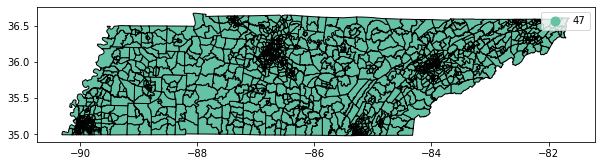

In [26]:
census_tract[census_tract['STATEFP']== '47'].plot(column='STATEFP',figsize=(10,10), edgecolor='black',legend =True, cmap='Set2')


Converting incidence DataFrame to GeoPanda:

Create a geometry column that is a Point datatype

In [27]:
burglary['geometry'] = burglary.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)
burglary.head(3)

C:\Users\U6033919\AppData\Local\Temp/ipykernel_5244/681118420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglary['geometry'] = burglary.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)


,incident_reported,offense_description,latitude,longitude,zip_code,geometry
62,2021-01-01,BURGLARY- AGGRAVATED,36.17,-86.756,37206.0,POINT (-86.756 36.17)
301,2021-01-01,BURGLARY- AGGRAVATED,36.25,-86.660,NaN,POINT (-86.66 36.25)
315,2021-01-01,BURGLARY- AGGRAVATED,36.15,-86.820,NaN,POINT (-86.81999999999999 36.15)


In [28]:
census_tract.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

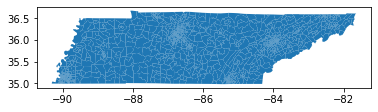

In [51]:
census_tract.plot()

Create a GeoDataFrame

In [53]:
burglary_geo=gpd.GeoDataFrame(burglary, crs=census_tract.crs, geometry = census_tract['geometry'])

In [54]:
type(burglary_geo)

geopandas.geodataframe.GeoDataFrame

In [32]:
#Gives an error that this is not Geodatafrme: census_tract[['STATEFP','COUNTYFP','geometry']]

MERGE Burglary_geopanda with census_tract

In [55]:
burglary_by_census = gpd.sjoin(burglary_geo, census_tract, op= 'within' )

In [56]:
burglary_by_census.head()

,incident_reported,offense_description,latitude,longitude,zip_code,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
62,2021-01-01,BURGLARY- AGGRAVATED,36.17,-86.756,37206.0,"POLYGON ((-89.95303 35.16457, -89.95260 35.164...",62,47,157,001100,47157001100,11,Census Tract 11,G5020,S,1751403,0,+35.1674039,-089.9411009
301,2021-01-01,BURGLARY- AGGRAVATED,36.25,-86.660,NaN,"POLYGON ((-89.94937 35.09349, -89.94937 35.093...",301,47,157,008000,47157008000,80,Census Tract 80,G5020,S,2681198,0,+35.1004575,-089.9399793
315,2021-01-01,BURGLARY- AGGRAVATED,36.15,-86.820,NaN,"POLYGON ((-87.08312 35.68887, -87.08308 35.689...",315,47,119,010201,47119010201,102.01,Census Tract 102.01,G5020,S,107057458,130243,+35.7348720,-087.0120799
350,2021-01-02,BURGLARY- AGGRAVATED,36.15,-86.780,NaN,"POLYGON ((-83.43904 36.20548, -83.43857 36.205...",350,47,063,101200,47063101200,1012,Census Tract 1012,G5020,S,33318232,10289491,+36.2166718,-083.3895808
351,2021-01-02,BURGLARY- AGGRAVATED,36.15,-86.780,NaN,"POLYGON ((-83.28380 36.18680, -83.28374 36.187...",351,47,063,100700,47063100700,1007,Census Tract 1007,G5020,S,89862854,3044928,+36.1779434,-083.2239961


In [35]:
#incd_aggrv_by_census_47=incd_aggrv_by_census.loc[incd_aggrv_by_census['STATEFP']== '47']
#incd_aggrv_by_census_47.shape()

In [57]:
burglary_by_census['TRACTCE'].value_counts()

001100    1
008000    1
960100    1
960500    1
950600    1
080302    1
061702    1
930100    1
050909    1
051002    1
030600    1
040805    1
021106    1
040305    1
100500    1
100600    1
100800    1
100300    1
100700    1
101200    1
010201    1
980200    1
Name: TRACTCE, dtype: int64

In [41]:
census_tract_names=burglary_by_census['NAME']

In [70]:
census_tract_names=pd.DataFrame(census_tract_names)

In [71]:
polygon=pd.merge(census_tract, census_tract_names, on = 'NAME')

In [72]:
polygon.head()
polygon.drop_duplicates(subset='NAME')

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,121,960100,47121960100,9601,Census Tract 9601,G5020,S,159466379,21688012,+35.6505075,-084.7042500,"POLYGON ((-84.81166 35.57717, -84.81164 35.577..."
6,47,135,930100,47135930100,9301,Census Tract 9301,G5020,S,407522668,10184978,+35.7611165,-087.8643000,"POLYGON ((-88.03487 35.71645, -88.03479 35.717..."
11,47,065,001100,47065001100,11,Census Tract 11,G5020,S,1697497,0,+35.0396542,-085.2805689,"POLYGON ((-85.29199 35.03998, -85.29172 35.040..."
15,47,145,030600,47145030600,306,Census Tract 306,G5020,S,38244993,4390347,+35.8747782,-084.5698722,"POLYGON ((-84.61151 35.88234, -84.61113 35.883..."
17,47,125,100700,47125100700,1007,Census Tract 1007,G5020,S,2299817,0,+36.5271978,-087.3340849,"POLYGON ((-87.34857 36.52659, -87.34739 36.527..."
19,47,125,100800,47125100800,1008,Census Tract 1008,G5020,S,3919141,109229,+36.5369468,-087.3542982,"POLYGON ((-87.37099 36.53878, -87.37069 36.539..."
21,47,157,008000,47157008000,80,Census Tract 80,G5020,S,2681198,0,+35.1004575,-089.9399793,"POLYGON ((-89.94937 35.09349, -89.94937 35.093..."
22,47,119,010201,47119010201,102.01,Census Tract 102.01,G5020,S,107057458,130243,+35.7348720,-087.0120799,"POLYGON ((-87.08312 35.68887, -87.08308 35.689..."
25,47,063,101200,47063101200,1012,Census Tract 1012,G5020,S,33318232,10289491,+36.2166718,-083.3895808,"POLYGON ((-83.43904 36.20548, -83.43857 36.205..."
26,47,063,100300,47063100300,1003,Census Tract 1003,G5020,S,4174789,0,+36.2032599,-083.2983318,"POLYGON ((-83.31976 36.20677, -83.31813 36.206..."


C:\Users\U6033919\Anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


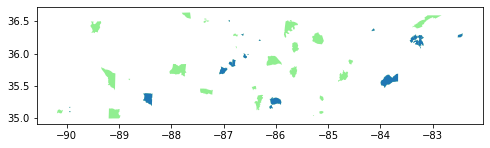

In [73]:
ax = polygon.plot(column='TRACTCE',figsize = (8, 10), color = 'lightgreen')
burglary_by_census.plot(ax = ax, column = 'offense_description')
plt.show()

In [46]:
with open('../api_key') as fi:
    credentials = json.load(fi)
       
api_key = credentials['api_key']

In [47]:
endpoint = "https://api.census.gov/data/2019/acs/acs5"

params = {
       'get' : 'NAME,B01001_001E',
       'for' : 'tract:*',
       'in'  : ['state:47', 'county:037'],
       'key' : api_key
}

In [62]:
response = requests.get(endpoint, params=params)


In [66]:
res = response.json()
population = pd.DataFrame(res)
population
population=population.loc[:,1:]
population.head()

,1,2,3,4
0,B01001_001E,state,county,tract
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702


In [78]:
population.columns


RangeIndex(start=1, stop=5, step=1)

In [79]:
header=population.loc[0]
header

1    B01001_001E
2          state
3         county
4          tract
Name: 0, dtype: object

In [80]:
population[1:]

,1,2,3,4
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702
5,8254,47,037,018301
...,...,...,...,...
157,5252,47,037,015613
158,7262,47,037,015620
159,2345,47,037,016100
160,4617,47,037,011400


In [81]:
#population=population[1:]

In [82]:
population.head()

,1,2,3,4
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702
5,8254,47,037,018301


In [85]:
population.columns=header
population.head()
population.columns

Index(['B01001_001E', 'state', 'county', 'tract'], dtype='object', name=0)

In [102]:
population_by_tract=pd.merge(left=polygon, right=population, left_on = 'TRACTCE', right_on = 'tract')

In [103]:
population_by_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B01001_001E,state,county,tract
0,47,119,010201,47119010201,102.01,Census Tract 102.01,G5020,S,107057458,130243,+35.7348720,-087.0120799,"POLYGON ((-87.08312 35.68887, -87.08308 35.689...",4157,47,037,010201
1,47,065,010201,47065010201,102.01,Census Tract 102.01,G5020,S,37974189,3892588,+35.3024990,-085.1161679,"POLYGON ((-85.16438 35.30709, -85.16434 35.307...",4157,47,037,010201
2,47,037,010201,47037010201,102.01,Census Tract 102.01,G5020,S,23718545,0,+36.2882537,-086.7728157,"POLYGON ((-86.81736 36.27398, -86.81733 36.274...",4157,47,037,010201
3,47,065,980200,47065980200,9802,Census Tract 9802,G5020,S,26731894,0,+35.0892045,-085.1312515,"POLYGON ((-85.16965 35.09932, -85.16963 35.099...",0,47,037,980200
4,47,157,980200,47157980200,9802,Census Tract 9802,G5020,S,41266569,4249286,+35.1037821,-090.1408240,"POLYGON ((-90.18863 35.07573, -90.18206 35.089...",0,47,037,980200


In [127]:
endpoint = "https://https://api.census.gov/data/2019/acs/acs5/subject"

params = {
       'get' : 'NAME,S1901_C01_012E',
       'for' : 'tract:*',
       'in'  : 'state:47',
       'in'  : 'county:037',
       'key' : api_key
}



In [126]:
response = requests.get(endpoint, params=params)
res

ConnectionError: HTTPSConnectionPool(host='https', port=443): Max retries exceeded with url: //api.census.gov/data/2019/acs/acs5/subject?get=NAME%2CS1901_C01_012E&for=tract%3A%2A&in=county%3A037&key=3c61f85f53afa16799d1bbff242bd934aff379ce (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000212C13112E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [112]:
res = response.json()
median_income = pd.DataFrame(res)
median_income.head()
median_income=median_income.iloc[:,1:]
median_income.head()

,1,2,3,4
0,B01001_001E,state,county,tract
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702


In [116]:
header1=median_income.loc[0]
header1

1    B01001_001E
2          state
3         county
4          tract
Name: 0, dtype: object

In [117]:
#median_income=median_income[1:]


In [118]:
median_income.head()

,1,2,3,4
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702
5,8254,47,037,018301


In [120]:
median_income.columns=header1

In [121]:
median_income.head()

,B01001_001E,state,county,tract
1,12176,47,037,015631
2,4098,47,037,015804
3,2466,47,037,017701
4,5210,47,037,017702
5,8254,47,037,018301


In [122]:
population_by_tract_income=pd.merge(population_by_tract, median_income, left_on='tract', right_on='tract')

In [123]:
population_by_tract_income.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B01001_001E_x,state_x,county_x,tract,B01001_001E_y,state_y,county_y
0,47,119,010201,47119010201,102.01,Census Tract 102.01,G5020,S,107057458,130243,+35.7348720,-087.0120799,"POLYGON ((-87.08312 35.68887, -87.08308 35.689...",4157,47,037,010201,4157,47,037
1,47,065,010201,47065010201,102.01,Census Tract 102.01,G5020,S,37974189,3892588,+35.3024990,-085.1161679,"POLYGON ((-85.16438 35.30709, -85.16434 35.307...",4157,47,037,010201,4157,47,037
2,47,037,010201,47037010201,102.01,Census Tract 102.01,G5020,S,23718545,0,+36.2882537,-086.7728157,"POLYGON ((-86.81736 36.27398, -86.81733 36.274...",4157,47,037,010201,4157,47,037
3,47,065,980200,47065980200,9802,Census Tract 9802,G5020,S,26731894,0,+35.0892045,-085.1312515,"POLYGON ((-85.16965 35.09932, -85.16963 35.099...",0,47,037,980200,0,47,037
4,47,157,980200,47157980200,9802,Census Tract 9802,G5020,S,41266569,4249286,+35.1037821,-090.1408240,"POLYGON ((-90.18863 35.07573, -90.18206 35.089...",0,47,037,980200,0,47,037


Create a choropleth showing the number of burglaries per 1000 residents for each census tract.

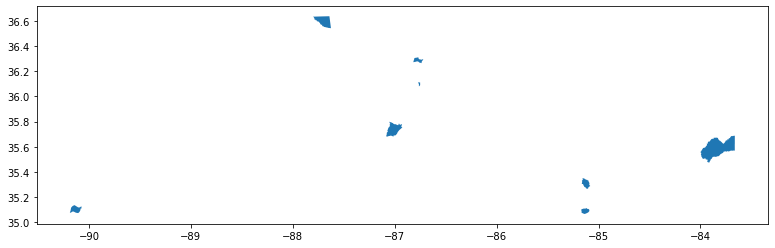

In [125]:
fig, ax = plt.subplots(figsize=(16,4))
population_by_tract_income.plot(column = '', 
                                cmap = 'GnBu', 
                                edgecolor = 'black', 
    
    ax = ax);